# Implementing Elliptic Curve Crytography based on ElGamal Technique

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
# Function to plot graph
def Plot_Graph(a,b):
    print("\nThe Graph for given equation is : \n")
    fig, ax = plt.subplots()

    y, x = np.ogrid[-4:4:1000j, -2:5:1000j]
    plt.contour(
        x.ravel(), y.ravel(), y**2 - x**3 - a*x -b, [0])
    plt.show()

# Generating points on Elliptic Curve
def Point_Generation(a,b,prime):
    print("\n========================================================\n")
    print("\nPoints that lie on elliptical curve : \n")
    Points_x, Points_y = [],[]
    for x in range(1, prime):
        for y in range(1, prime):
            if (y ** 2) % prime == (x**3 + (a * x) + b) % prime:
                Points_x.append(x)
                Points_y.append(y)
                print(" => (%s,%s)" %(x, y))
    return Points_x, Points_y

In [3]:
# Finding Inverse Modulo
def inverse(prime, num):
    if num<0:
        num = num + prime
    for i in range(1, prime):
        if (num * i) % prime == 1:
            return i
        # else:
            #print ("\nERROR : Inverse Modulo of 0 isn't possible. Please check the values :)")

# Function to add to points on Ellipic Curve
def Algebraic_Addition(x1, y1, x2, y2, a, prime):
    if (x1 == x2) and (y1 == y2):
        lamdba_value = (((3 * (x1 ** 2)) + a) * inverse(prime, (2 * y1))) % prime
    else:
        lamdba_value = ((y2 - y1) * inverse(prime, (x2 - x1))) % prime

    x3 = ((lamdba_value**2) - x2 - x1) % prime
    y3 = ((lamdba_value*(x1 - x3)) - y1) % prime
    return x3, y3

# Generating Base Points of Elliptic Curve
def Base_Point(Points_x,Points_y,a,prime):
    print("\nThe Base Point(s) of given Elliptical Curve is :\n")
    Temp, TempArray = 0, []

    while ((Points_x.__len__()) != Temp):
        TempArray.append(Points_x[Temp])
        x1, y1 = Points_x[Temp], Points_y[Temp]

        for i in range(1, (Points_x.__len__())):
            print(" => (%s,%s)" %(x1, y1))
            x1, y1 = Algebraic_Addition(x1, y1, Points_x[Temp], Points_y[Temp], a, prime)
            TempArray.append(x1)

        if set(Points_x).intersection(set(TempArray)) != 0:
            Global_x, Global_y = Points_x[Temp], Points_y[Temp]
            print("\nSelected Base point:(%s,%s)" %(Global_x, Global_y))
            break
        else:
            Temp += 1
            del TempArray[:]

    return Global_x, Global_y

In [4]:
# Key Generation Process
def Key_Generation(Global_x,Global_y,a,prime):
    print("\n===============================================\n")
    print("Key Generation Process starts here : \n")

    # Private Key Generation
    privateKey = 2
    print("The Random Number Chosen (The Private Key) is: ", privateKey)

    # Public Key Generation
    x1, y1 = Global_x, Global_y
    for i in range(0, privateKey):
        x1, y1 = Algebraic_Addition(x1, y1, Global_x, Global_y, a, prime)
    PublicKey_x, PublicKey_y = x1, y1

    # Random value 'k' Generation
    k = randint(2, prime - 1)
    print("\nThe Random value k is : ", k)

    # Generating C1 value
    C1x, C1y = Global_x, Global_y
    for i in range(0, k):
        C1x, C1y = Algebraic_Addition(C1x, C1y, Global_x, Global_y, a, prime)
    print("\nThe CipherKey C1 is: (%s,%s)" %(C1x,C1y))

    # Generating C2 value
    C2x, C2y = PublicKey_x, PublicKey_y
    for i in range(0, k):
        C2x, C2y = Algebraic_Addition(C2x, C2y, PublicKey_x, PublicKey_y, a, prime)
    print("\nThe CipherKey C2 is: (%s,%s)" %(C2x,C2y))
    return C1x,C1y,C2x,C2y,privateKey

In [5]:
# Generating Message coordinates (Here ASCII conversion)
def Message_Generation(message,prime):
    Mx, My = ord(message) - 96, ord(message) - 96
    print ("\n=====================================================\n")
    print ("Encryption Process starts here : \n")
    print ("Message Coordinates are - (%s,%s)\n" %(Mx,My))
    return Mx,My

# Generating Cipher Text
def Generation_CipherText(x,y,x1,y1,a,prime):
    cipher_x, cipher_y = Algebraic_Addition(x, y, x1, y1, a, prime)
    print("Cipher Text is: (%s,%s)" %(cipher_x,cipher_y))
    return cipher_x, cipher_y

# Decryption Process
def Decryption_Process(C1x,C1y,C2x,C2y,privateKey,a,prime):
    print ("\n======================================================\n")
    print ("Decryption Process starts here : \n")
    TempX, TempY = C1x, C1y
    for i in range(0,privateKey):
        TempX,TempY = Algebraic_Addition(TempX, TempY, C1x, C1y, a, prime)
    DecryptX, DecryptY = Algebraic_Addition(TempX, (TempY*(-1) + prime), C2x, C2y, a, prime)
    print("The Decrypted Message is: %s" %(chr(DecryptX+96)))

	Equation of elliptical curve is given by- 

		 y^2 = x^3 + a*x + b

Please Enter a prime number:  13
Please Enter the value of a:  1
Please Enter the value of b:  1
Please Enter the data to be send(Single letter between a-z): g

The Graph for given equation is : 



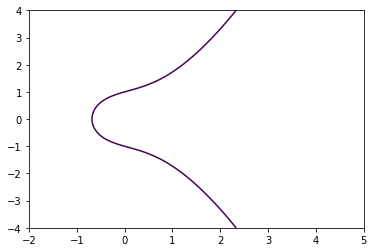




Points that lie on elliptical curve : 

 => (1,4)
 => (1,9)
 => (4,2)
 => (4,11)
 => (5,1)
 => (5,12)
 => (8,1)
 => (8,12)
 => (10,6)
 => (10,7)
 => (11,2)
 => (11,11)
 => (12,5)
 => (12,8)

The Base Point(s) of given Elliptical Curve is :

 => (1,4)
 => (8,12)
 => (0,12)
 => (11,11)
 => (5,1)
 => (10,6)
 => (12,8)
 => (4,2)
 => (7,0)
 => (4,11)
 => (12,5)
 => (10,7)
 => (5,12)

Selected Base point:(1,4)


Key Generation Process starts here : 

The Random Number Chosen (The Private Key) is:  2

The Random value k is :  4

The CipherKey C1 is: (5,1)

The CipherKey C2 is: (0,1)


Encryption Process starts here : 

Message Coordinates are - (7,7)

Cipher Text is: (7,6)


Decryption Process starts here : 

The Decrypted Message is: g


In [8]:
print("\tEquation of elliptical curve is given by- ")
print("\n\t\t y^2 = x^3 + a*x + b\n")

# Taking Input a,b and prime
def Input_Data():
    prime = int(input("Please Enter a prime number:  "))
    a = int(input("Please Enter the value of a:  "))
    b = int(input("Please Enter the value of b:  "))
    message = input("Please Enter the data to be send(Single letter between a-z): ")
    if (((4 * (a ** 3)) + (27 * (b ** 2))) % prime) == 0:
        print("\nERROR : a and b values don't satisfy basic condition.")
        print("Enter again: \n")
        Input_Data()
    else:
        return a, b, prime, message

# Taking Input
a, b, prime, message = Input_Data()

# Plotting Graph
Plot_Graph(a,b)

# Generate Points on Elliptic Curve
Points_x, Points_y = Point_Generation(a,b,prime)

# Generating All Possible Base Points
Global_x, Global_y = Base_Point(Points_x,Points_y,a,prime)

# Generating C1 and C2 Keys
C1x,C1y,C2x,C2y,privateKey = Key_Generation(Global_x,Global_y,a,prime)

# Finding Message ASCII coordinates
Mx,My = Message_Generation(message,prime)

# Generate C = C1 + C2 cipherText
cipher_x, cipher_y = Generation_CipherText(Mx,My,C2x,C2y,a,prime)

# Decrypt the message sent
Decryption_Process(C1x,C1y,cipher_x, cipher_y,privateKey,a,prime)